In [2]:
# Input the DB to Memory
import pandas as pd
import numpy as np
print("Loading DB...")
data_file = pd.ExcelFile("globalterrorismdb_0616dist.xlsx")
#data_file = pd.ExcelFile("test_data.xlsx")
print("DB Read...")
print(data_file.sheet_names)
dfs = data_file.parse(data_file.sheet_names[0])
print("DB Parsed...")

Loading DB...
DB Read...
['Data']
DB Parsed...


In [19]:
%matplotlib inline
import seaborn as sns
import matplotlib as mp
columns = dfs.columns
total_entries = len(dfs)
for col in columns:
    print(col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
ingroup
ingroup2
ingroup3
gsubname3
motive
guncertain1
guncertain2
guncertain3
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt


nperps
nkill


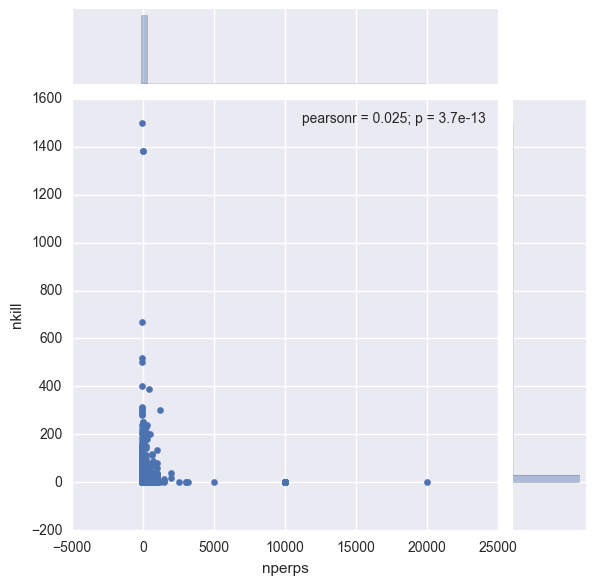

In [4]:
#nperps vs nkills
curr = columns[71]
sec = columns[100]
print(curr)
print(sec)
sns.jointplot(curr, sec, dfs)

attacktype1
nkill
X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN


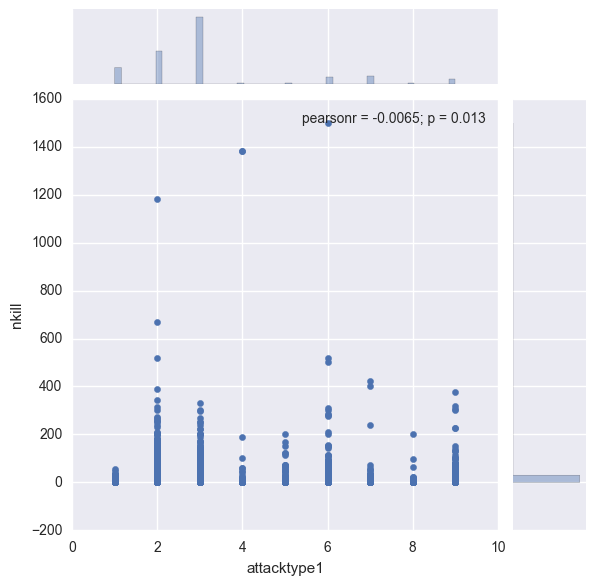

In [10]:
#attacktype1_txt vs nkills
curr = columns[28]
sec = columns[100]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
xaxes = ["ASSASSINATION","ARMED ASSAULT","BOMBING/EXPLOSION","HIJACKING","HOSTAGE TAKING (BARRICADE INCIDENT)","HOSTAGE TAKING (KIDNAPPING)","FACILITY / INFRASTRUCTURE ATTACK","UNARMED ASSAULT", "UNKNOWN"]
print(curr)
print(sec)
print(xaxes_str)
sns.jointplot(curr, sec, dfs)

weaptype1
nkill
1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown


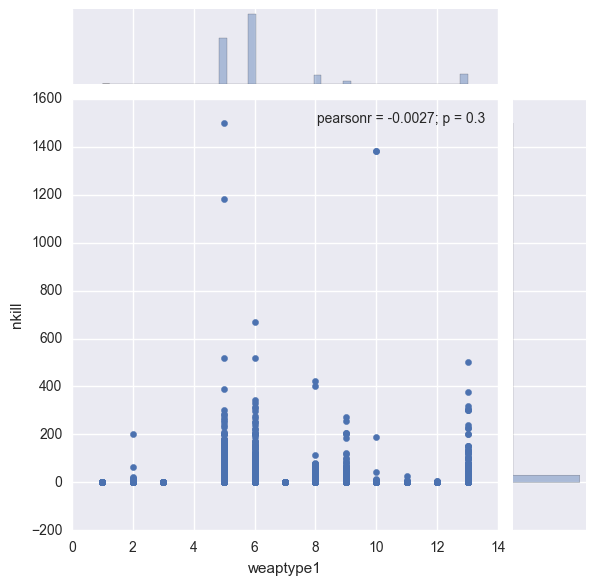

In [14]:
#weaptype1 vs nkills
curr = columns[83]
sec = columns[100]
xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
print(xaxes_str)
sns.jointplot(curr, sec, dfs)

country
nkill


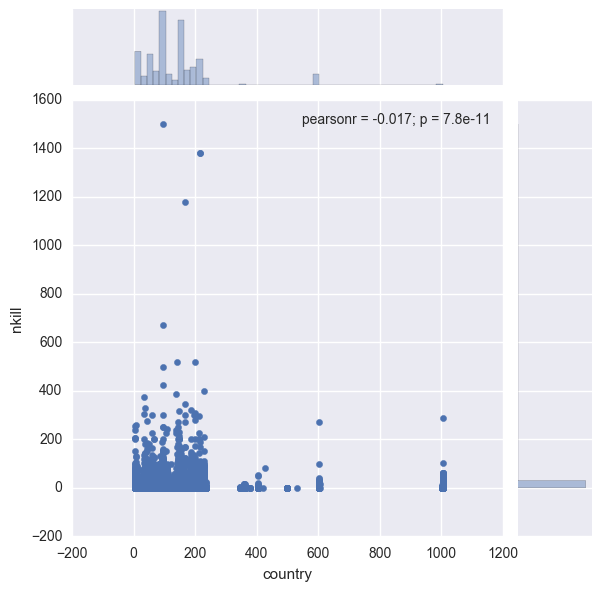

In [22]:
#country vs nkills
curr = columns[7]
sec = columns[100]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

attacktype1
weaptype1
X Axis Legend: X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN
Y Axis Legend: 1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown


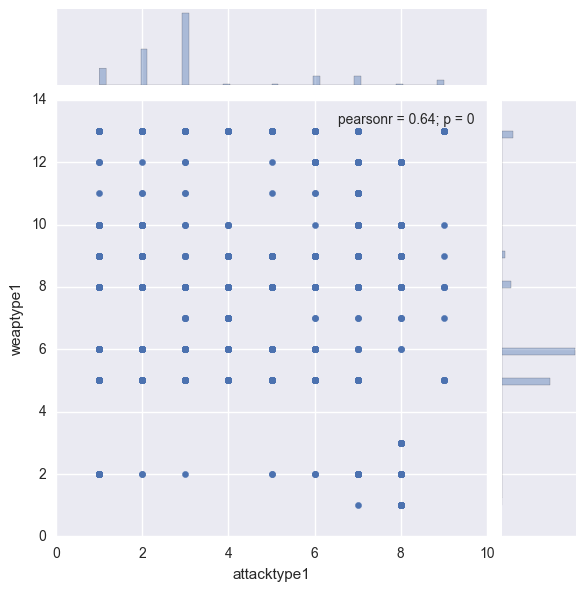

In [24]:
#Attacktype vs weapon type
curr = columns[28]
sec = columns[83]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
yaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
print("X Axis Legend: " + xaxes_str)
print("Y Axis Legend: " + yaxes_str)
sns.jointplot(curr, sec, dfs)

country
nperps


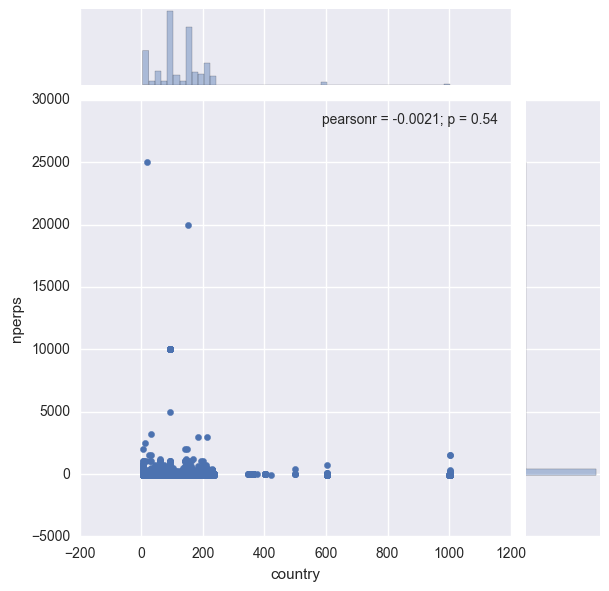

In [25]:
#country vs nperps
curr = columns[7]
sec = columns[71]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

attacktype1
nperps
X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN


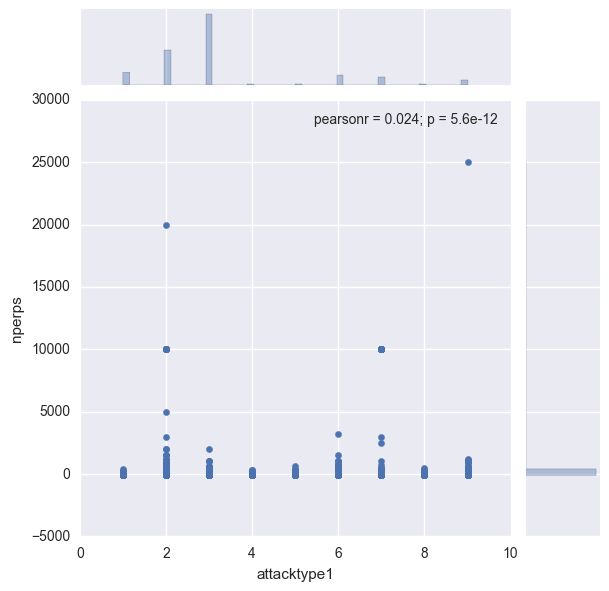

In [26]:
#attacktype1_txt vs nperps
curr = columns[28]
sec = columns[71]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
xaxes = ["ASSASSINATION","ARMED ASSAULT","BOMBING/EXPLOSION","HIJACKING","HOSTAGE TAKING (BARRICADE INCIDENT)","HOSTAGE TAKING (KIDNAPPING)","FACILITY / INFRASTRUCTURE ATTACK","UNARMED ASSAULT", "UNKNOWN"]
print(curr)
print(sec)
print(xaxes_str)
sns.jointplot(curr, sec, dfs)

weaptype1
nperps
X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN


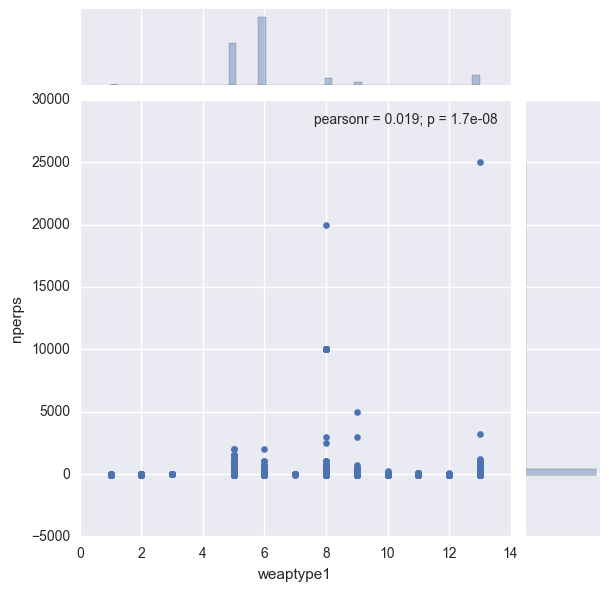

In [28]:
#weaptype1 vs nperps
curr = columns[83]
sec = columns[71]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
xaxes = ["ASSASSINATION","ARMED ASSAULT","BOMBING/EXPLOSION","HIJACKING","HOSTAGE TAKING (BARRICADE INCIDENT)","HOSTAGE TAKING (KIDNAPPING)","FACILITY / INFRASTRUCTURE ATTACK","UNARMED ASSAULT", "UNKNOWN"]
print(curr)
print(sec)
print(xaxes_str)
sns.jointplot(curr, sec, dfs)

country
ingroup


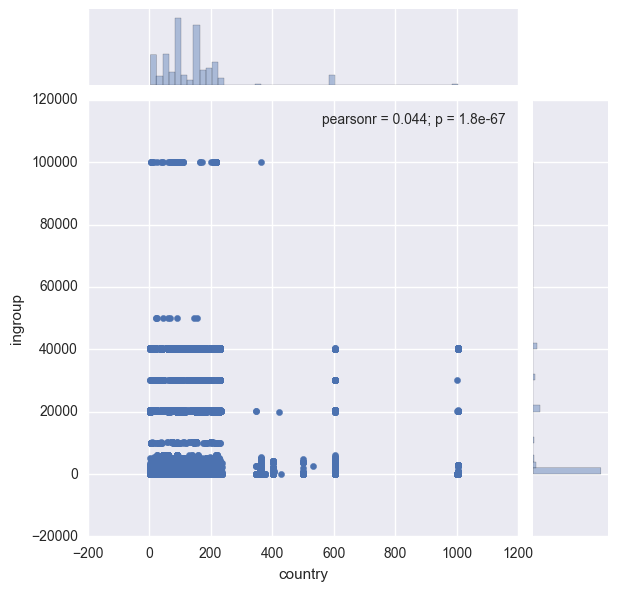

In [29]:
#country vs ingroup
curr = columns[7]
sec = columns[63]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

nkill
ingroup


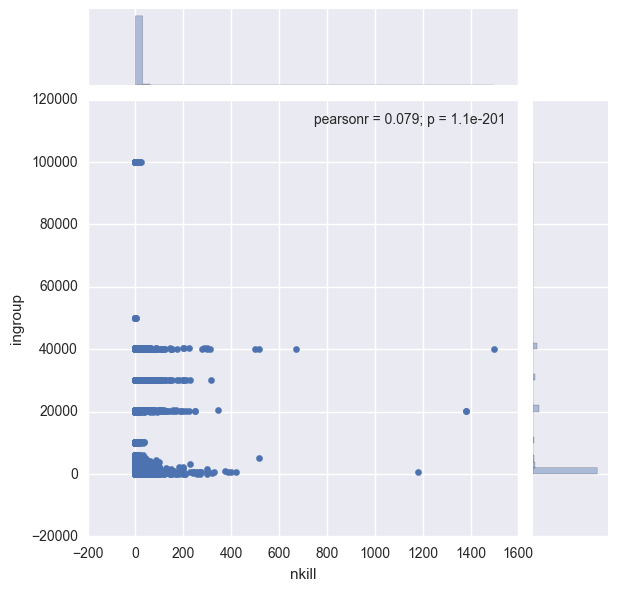

In [30]:
#nkill vs ingroup
curr = columns[100]
sec = columns[63]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

nkill
success


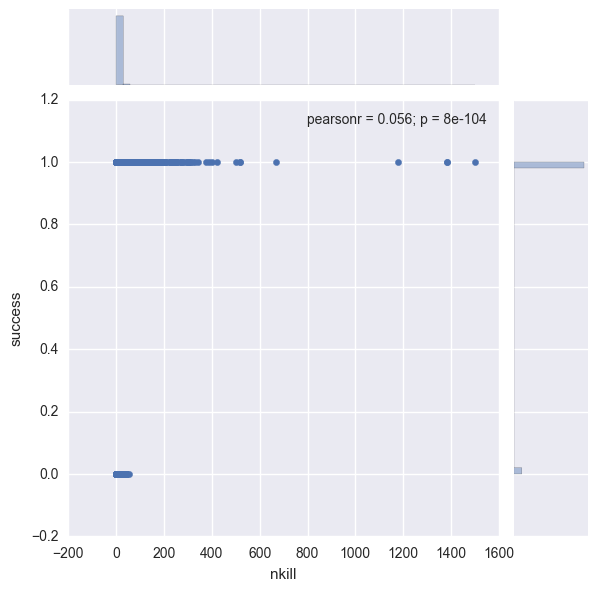

In [31]:
#nkill vs success
curr = columns[100]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

ingroup
success


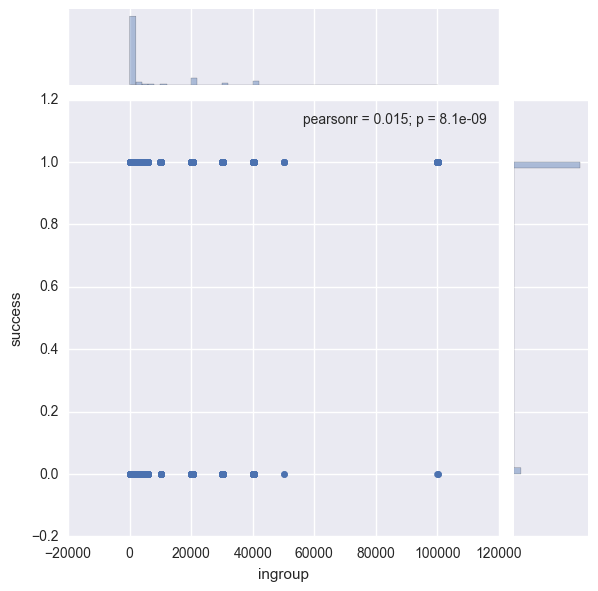

In [32]:
#ingroup vs success
curr = columns[63]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

nperps
success


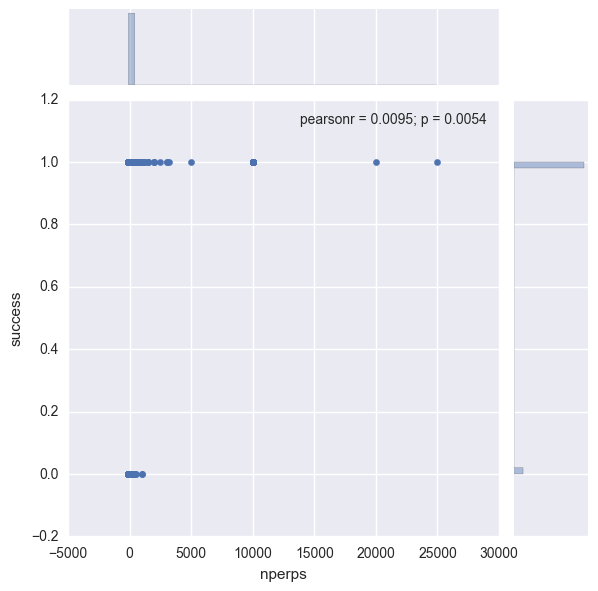

In [33]:
#nperps vs success
curr = columns[71]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

country
success


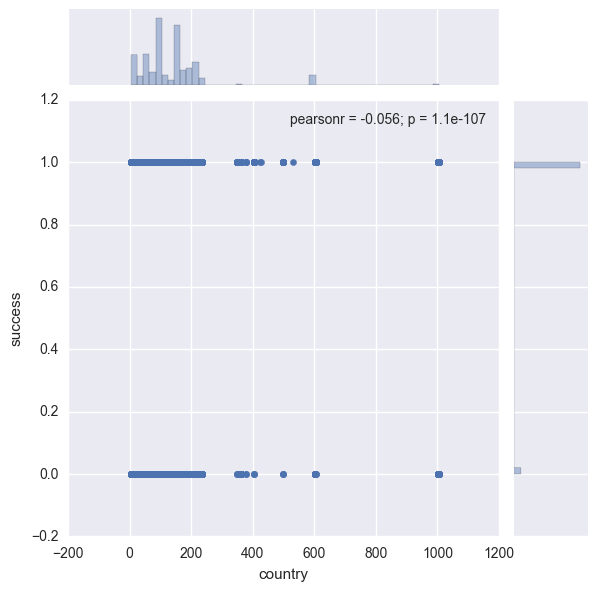

In [34]:
#country vs success
curr = columns[7]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

attacktype1
success


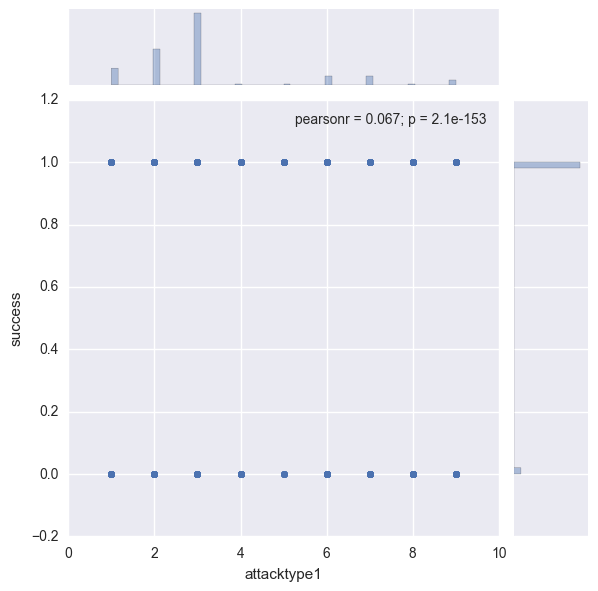

In [35]:
#attacktype vs success
curr = columns[28]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

weaptype1
success


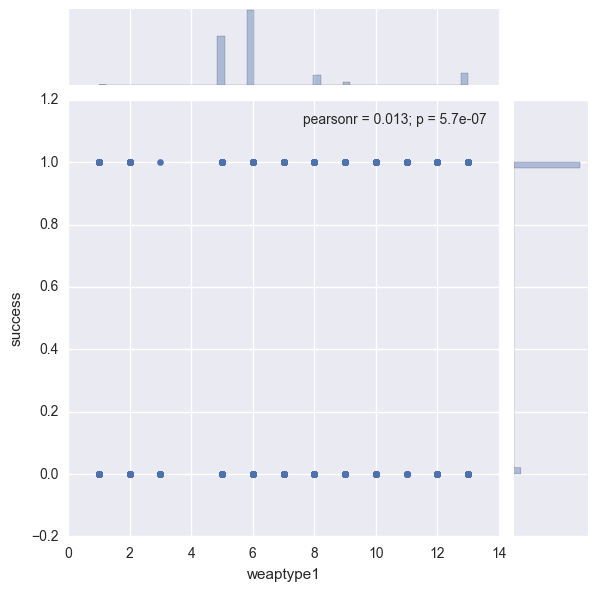

In [36]:
#weaoontype vs success
curr = columns[83]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)